## Exploratory Data Analysis and Preprocessing

##### The purpose of this notebook is twofold. Firstly, to perform exploratory data analysis (EDA) on the credit rating dataset in order to understand the characteristics of the data. Secondly, to conduct the preprocessing steps necessary to prepare the dataset for machine learning algorithms to be applied.

##### The first section produces descriptive statistics to gain a global view of the dataset. Visualisations are produced to further consider the relationship between features and identify any undesirable characteristics to be addressed before modelling.

##### The second section performs a number of pre-processing steps identified in the previous section.

##### The cleaned dataset is saved and loaded into training.ipynb for analysis.

### Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.creation import CyclicalFeatures
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None) 

In [2]:
# Load data
data = pd.read_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/corporate_rating.csv')

### Data Exporation

In [3]:
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,0.165085,1.098948,5.535506,3.008012,0.750500,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,0.167953,1.207476,6.171983,2.156783,0.683222,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,0.133060,0.993501,4.991711,3.094575,0.755774,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,0.093279,1.229563,6.017408,2.630950,0.724590,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,0.186047,1.081710,5.437795,3.012780,0.750796,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


It is immediately clear that 'Name' and 'Symbol' will not hold predictive power and can be removed. 'Date' should be converted to a datetime object and split into 'Year', 'Month' and 'Day'. The number of categories in 'Rating Agency Name' and Sector' should be investigated to ensure that this will not add too many new features when one-hot encoding is applied. 'Rating' is the target variable and will be label encoded to ensure that sci-kit learn algorithms can be applied.

In [4]:
# Check features and target
print("The dataset has", data.shape[0], "records, each with", data.shape[1], "attributes")

The dataset has 2029 records, each with 31 attributes


In [5]:
# Check data types and number of missing values
print("The data types of each column are listed below")
data.info()

The data types of each column are listed below
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 

No features have missing values.

In [6]:
# Check distributions of numerical variables
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,143.494296,3.678340e+03,7.269487e+03,2.328306,0.661495,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,4406.515045,9.565410e+04,1.889967e+05,87.528880,0.208921,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,-63.814815,-9.157477e+00,-2.679777e+01,-2556.419643,0.000000,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,0.050254,3.872355e-01,1.019889e+00,1.044617,0.535562,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,0.122383,6.983455e-01,3.811684e+00,1.652456,0.640915,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,0.201652,1.096211e+00,8.518476e+00,2.635023,0.749869,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,141350.211000,2.553149e+06,5.156884e+06,2561.871795,1.927839,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


Large max values for some features indicate that outliers may be present.

### Data Visualisation

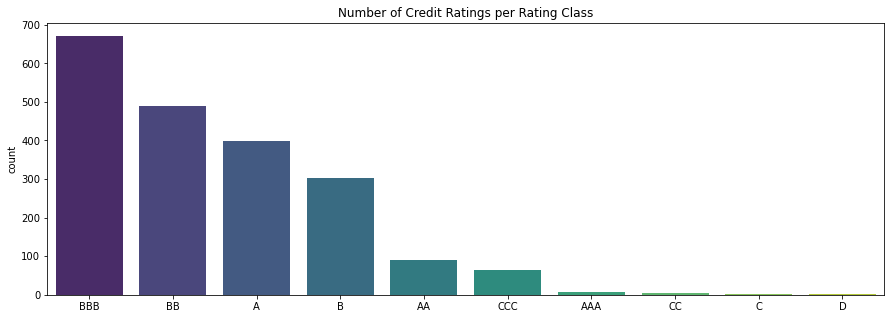

In [7]:
# Check classes and balance of target variable
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = data['Rating'].values, data=data, order = data['Rating'].value_counts().index, palette = "viridis")
ax.set_title("Number of Credit Ratings per Rating Class")
plt.show()

The dataset is highly imbalanced. This can be addressed by adding the last four minority classes 
to existing groups. Resampling methods will also be considered in model training.

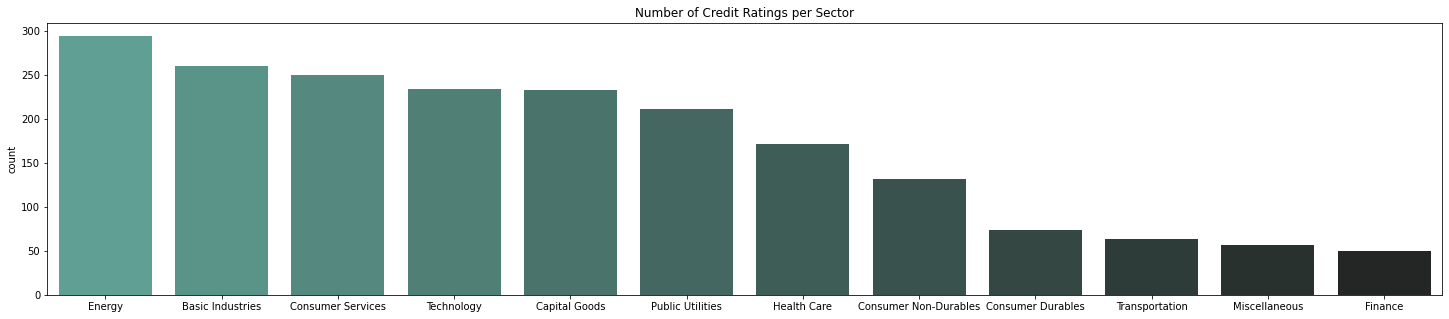

In [8]:
# Check distribution of credit ratings between Sectors
fig, ax = plt.subplots(figsize = (25, 5))
sns.countplot(x = data['Sector'].values, data=data, order = data['Sector'].value_counts().index, palette = "dark:#5A9_r")
ax.set_title("Number of Credit Ratings per Sector")
plt.show()

There are twelve sectors. Relative to the size of the dataset, this number should not create a large number of sparse features, which could lead to overfitting and poor model performance. The distribution of sectors is not heavily skewed and all sectors should be retained in the model.

(0.0, 1.0)

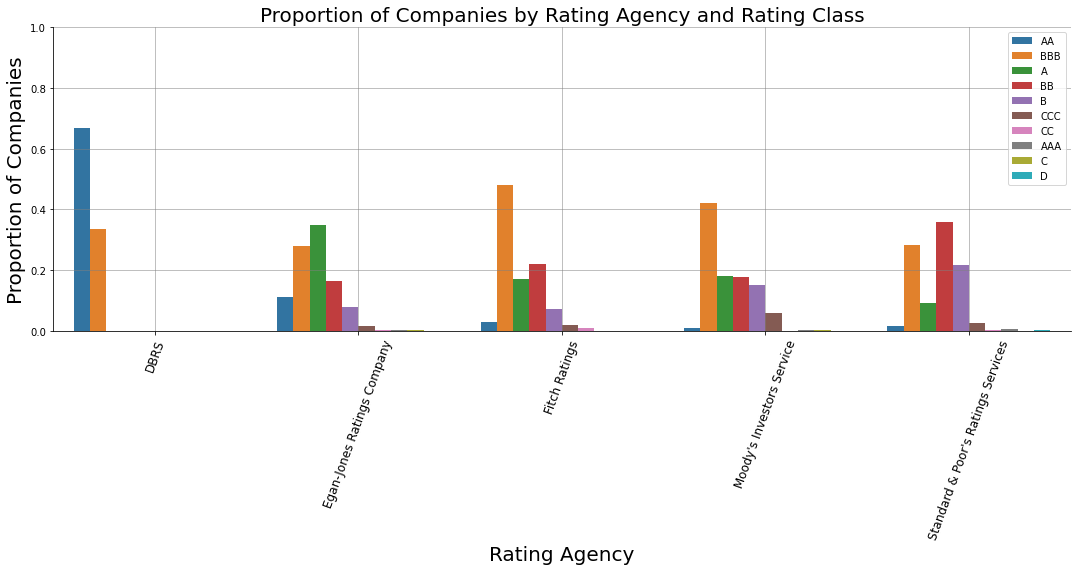

In [9]:
# Check distribution of rating classes by Rating Agency Name
tidy = pd.DataFrame(data.groupby('Rating Agency Name')['Rating'].value_counts(normalize = True))
tidy = tidy.rename(columns = {'Rating': 'Proportion'}).reset_index()

fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='Rating Agency Name', y='Proportion', hue='Rating', data=tidy, ax=ax1)
sns.despine(fig)
plt.tight_layout()
plt.xlabel("Rating Agency", fontsize=20)
plt.ylabel("Proportion of Companies", fontsize=20)
plt.title("Proportion of Companies by Rating Agency and Rating Class", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.legend(loc = 1)
plt.ylim(0,1)

A difference in distribution of ratings classes across different rating agencies indicates that this variable may hold some predictive power. However, this could be the nature of the particular dataset.

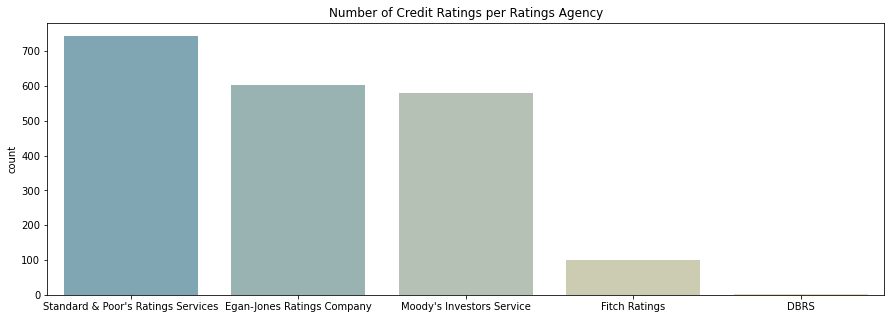

In [10]:
# Check number of ratings per Rating Agency Name
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = data['Rating Agency Name'].values, data=data, order = data['Rating Agency Name'].value_counts().index, palette = "blend:#7AB,#EDA" )
ax.set_title("Number of Credit Ratings per Ratings Agency")
plt.show()

Although DBRS rated far fewer companies than the other four ratings agencies, other features associated with these companies may still provide valuable information to the model. Companies rated by DBRS will therefore be retained in the model.

In [11]:
# Check whether Month may influence credit rating
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month and year from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

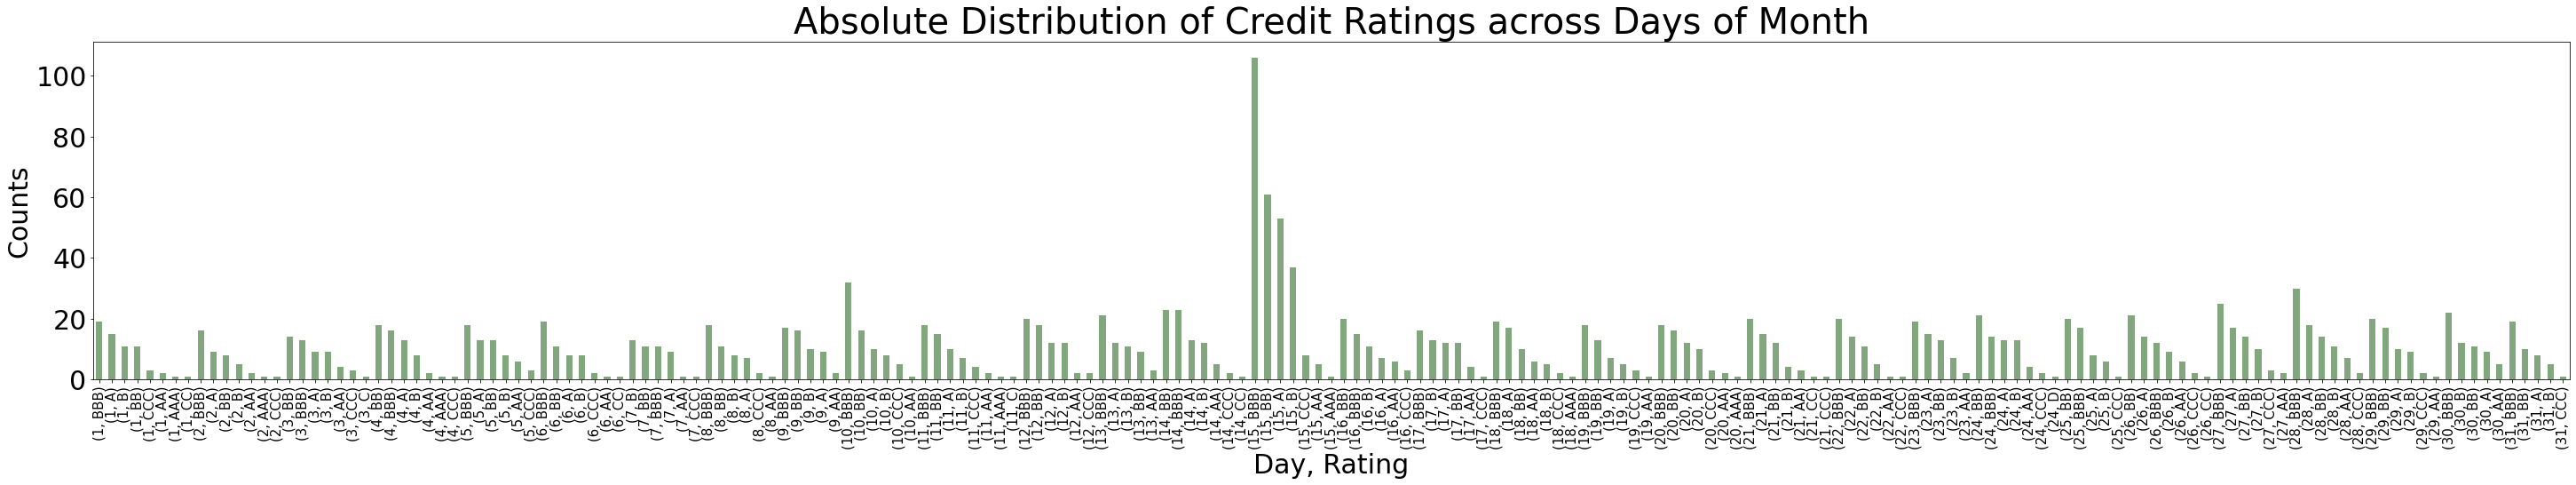

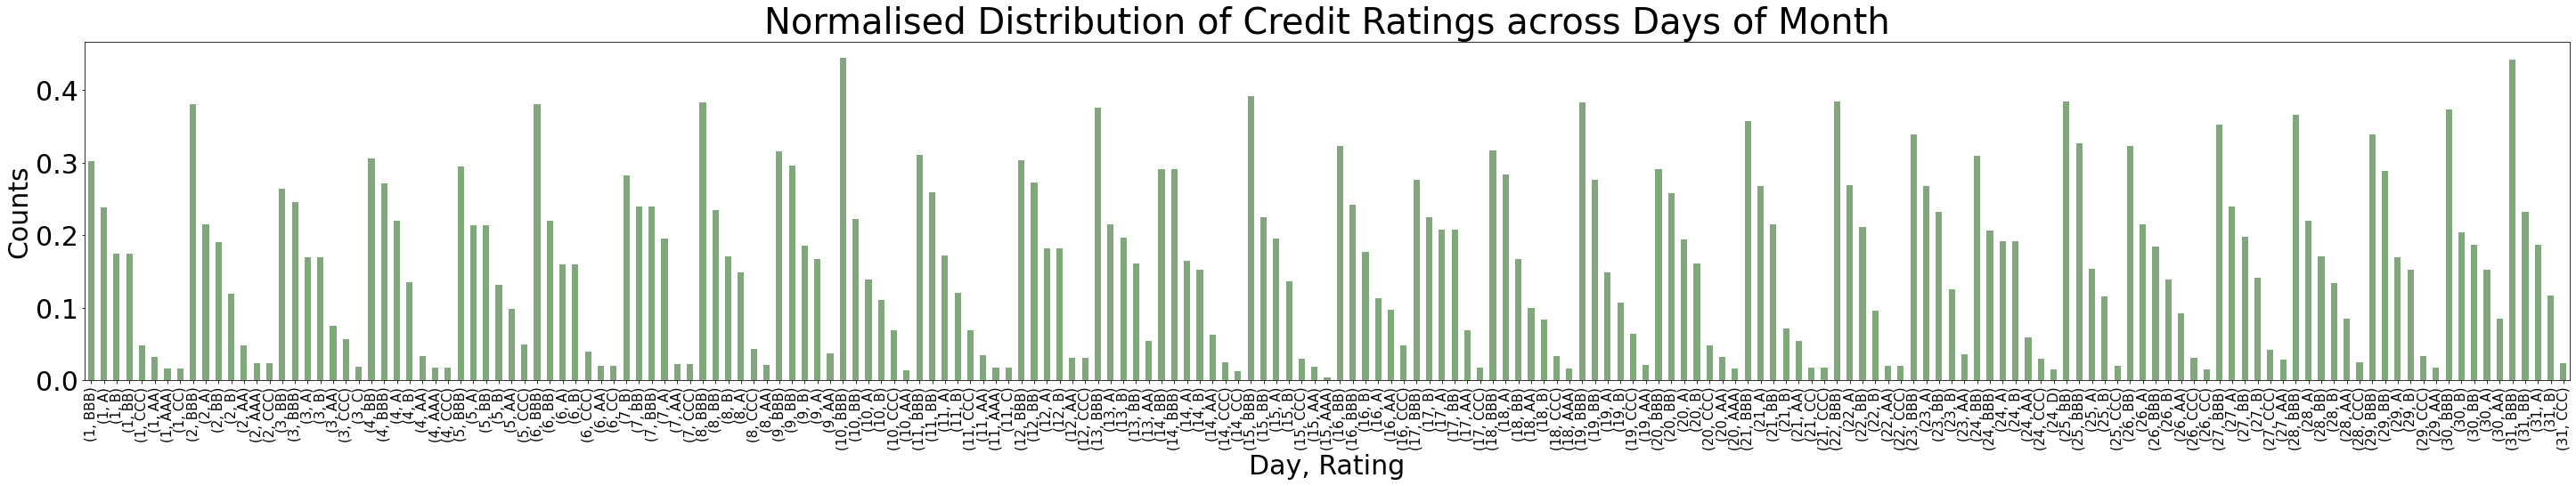

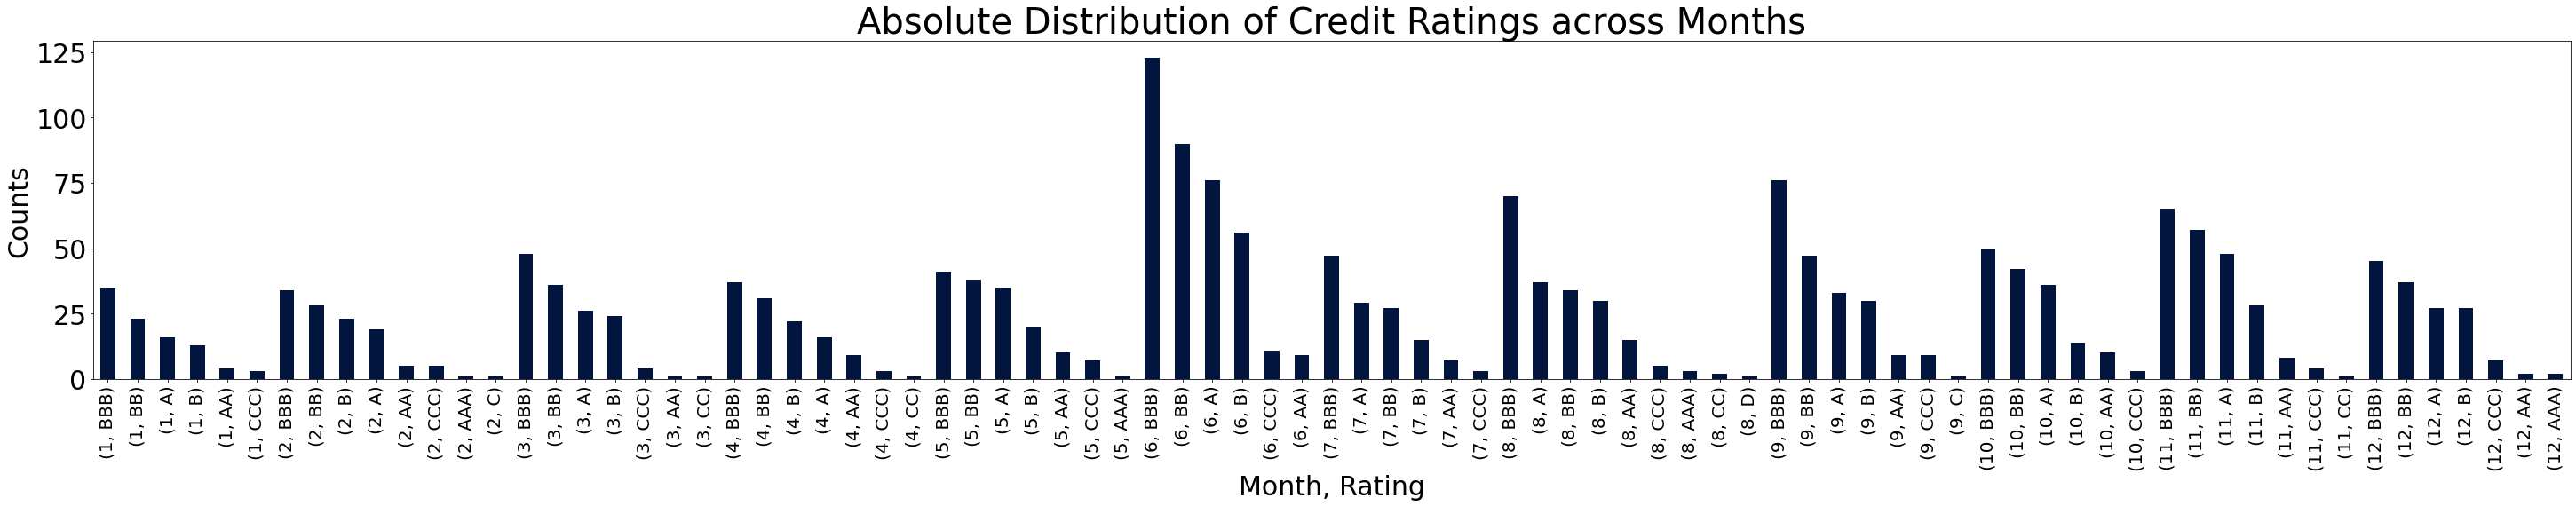

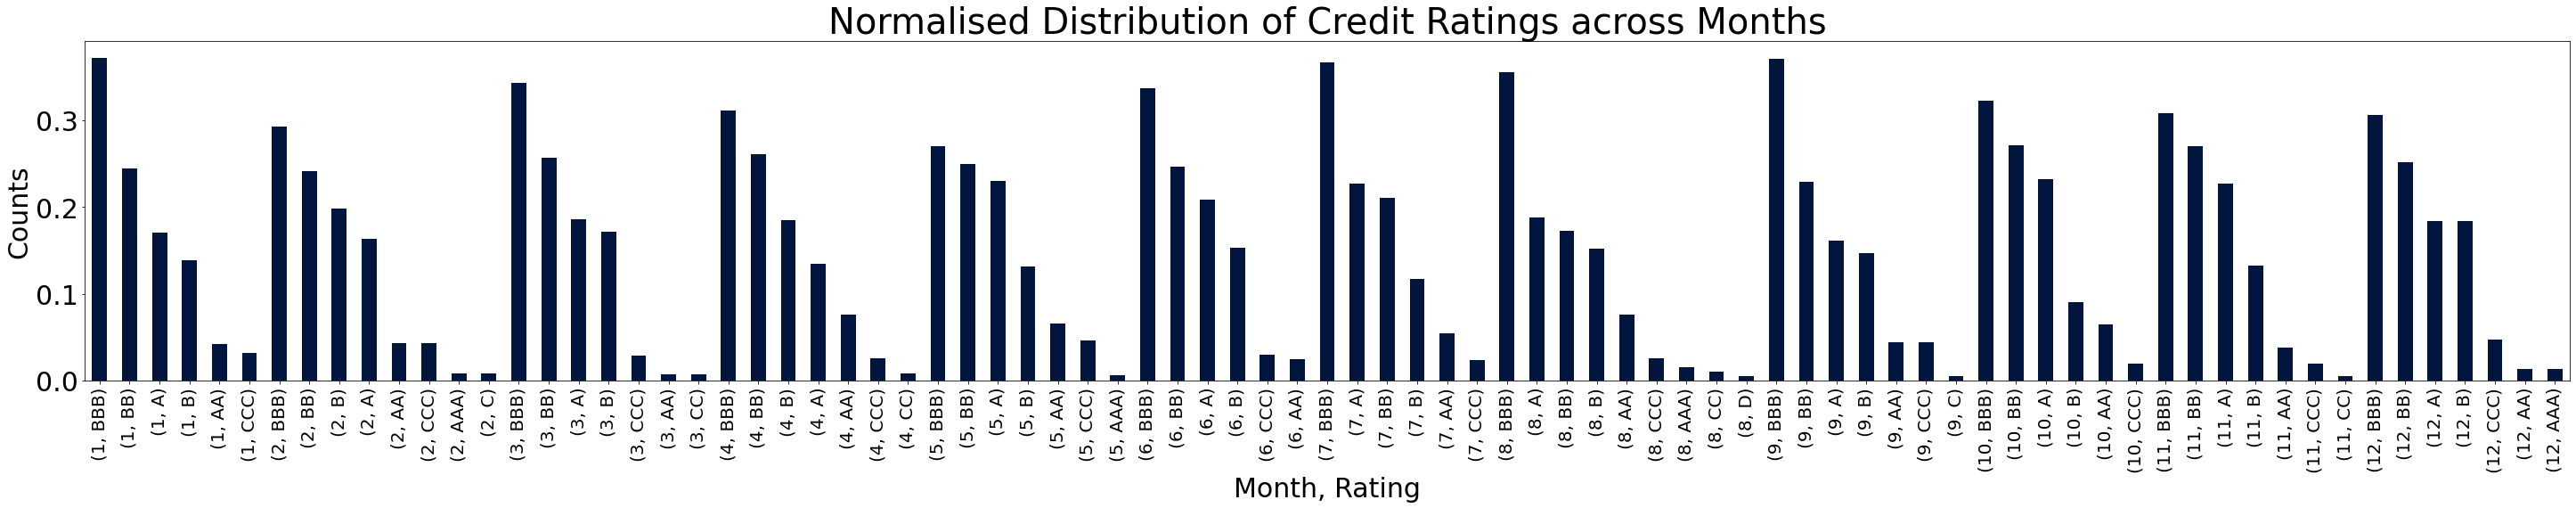

In [12]:
# Check distribution of ratings across Day and Month
fig, ax = plt.subplots(figsize = (50, 7))
day_rating_dist = data.groupby(["Day"])["Rating"].value_counts(normalize = False)
day_rating_dist.plot(kind = 'bar', color = "xkcd:greyish green")
ax.set_title('Absolute Distribution of Credit Ratings across Days of Month', size = 40)
ax.set_ylabel('Counts', size = 30)
ax.set_xlabel('Day, Rating', size = 30)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis = 'x', labelsize = 15)

fig, ax = plt.subplots(figsize = (50, 7))
day_rating_dist_norm = data.groupby(["Day"])["Rating"].value_counts(normalize = True)
day_rating_dist_norm.plot(kind = 'bar', color = "xkcd:greyish green")
ax.set_title('Normalised Distribution of Credit Ratings across Days of Month', size = 40)
ax.set_ylabel('Counts', size = 30)
ax.set_xlabel('Day, Rating', size = 30)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis = 'x', labelsize = 15)

fig, ax = plt.subplots(figsize = (50, 7))
day_rating_dist = data.groupby(["Month"])["Rating"].value_counts(normalize = False)
day_rating_dist.plot(kind = 'bar', color = "xkcd:navy")
ax.set_title('Absolute Distribution of Credit Ratings across Months', size = 40)
ax.set_ylabel('Counts', size = 30)
ax.set_xlabel('Month, Rating', size = 30)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis = 'x', labelsize = 20)

fig, ax = plt.subplots(figsize = (50, 7))
day_rating_dist_norm = data.groupby(["Month"])["Rating"].value_counts(normalize = True)
day_rating_dist_norm.plot(kind = 'bar', color = "xkcd:navy")
ax.set_title('Normalised Distribution of Credit Ratings across Months', size = 40)
ax.set_ylabel('Counts', size = 30)
ax.set_xlabel('Month, Rating', size = 30)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis = 'x', labelsize = 20)

The distribution of ratings across companies does not appear to change significantly depending on the day of the month, an expected observation. Although a larger number of credit ratings are assigned mid-month (15th), the distribution of ratings on this day is not significantly different to other days, so 'Day' should not have a significant impact on the model. Nevertheless, it will be retained and its predictive power investigated.

A similar result is found for 'Month', with a larger number of ratings made in June relative to other months. Again, the distribution of ratings in June is not different to other months, but the feature will be retained in the model.

'Month' and 'Day' are cyclical features and should be encoded to reflect this.

'Year' should be removed from the dataset. This may hold significant predictive power on a backwards-looking model, however the purpose of this model is to predict future credit ratings and as such, the model performance may be lower in practice.


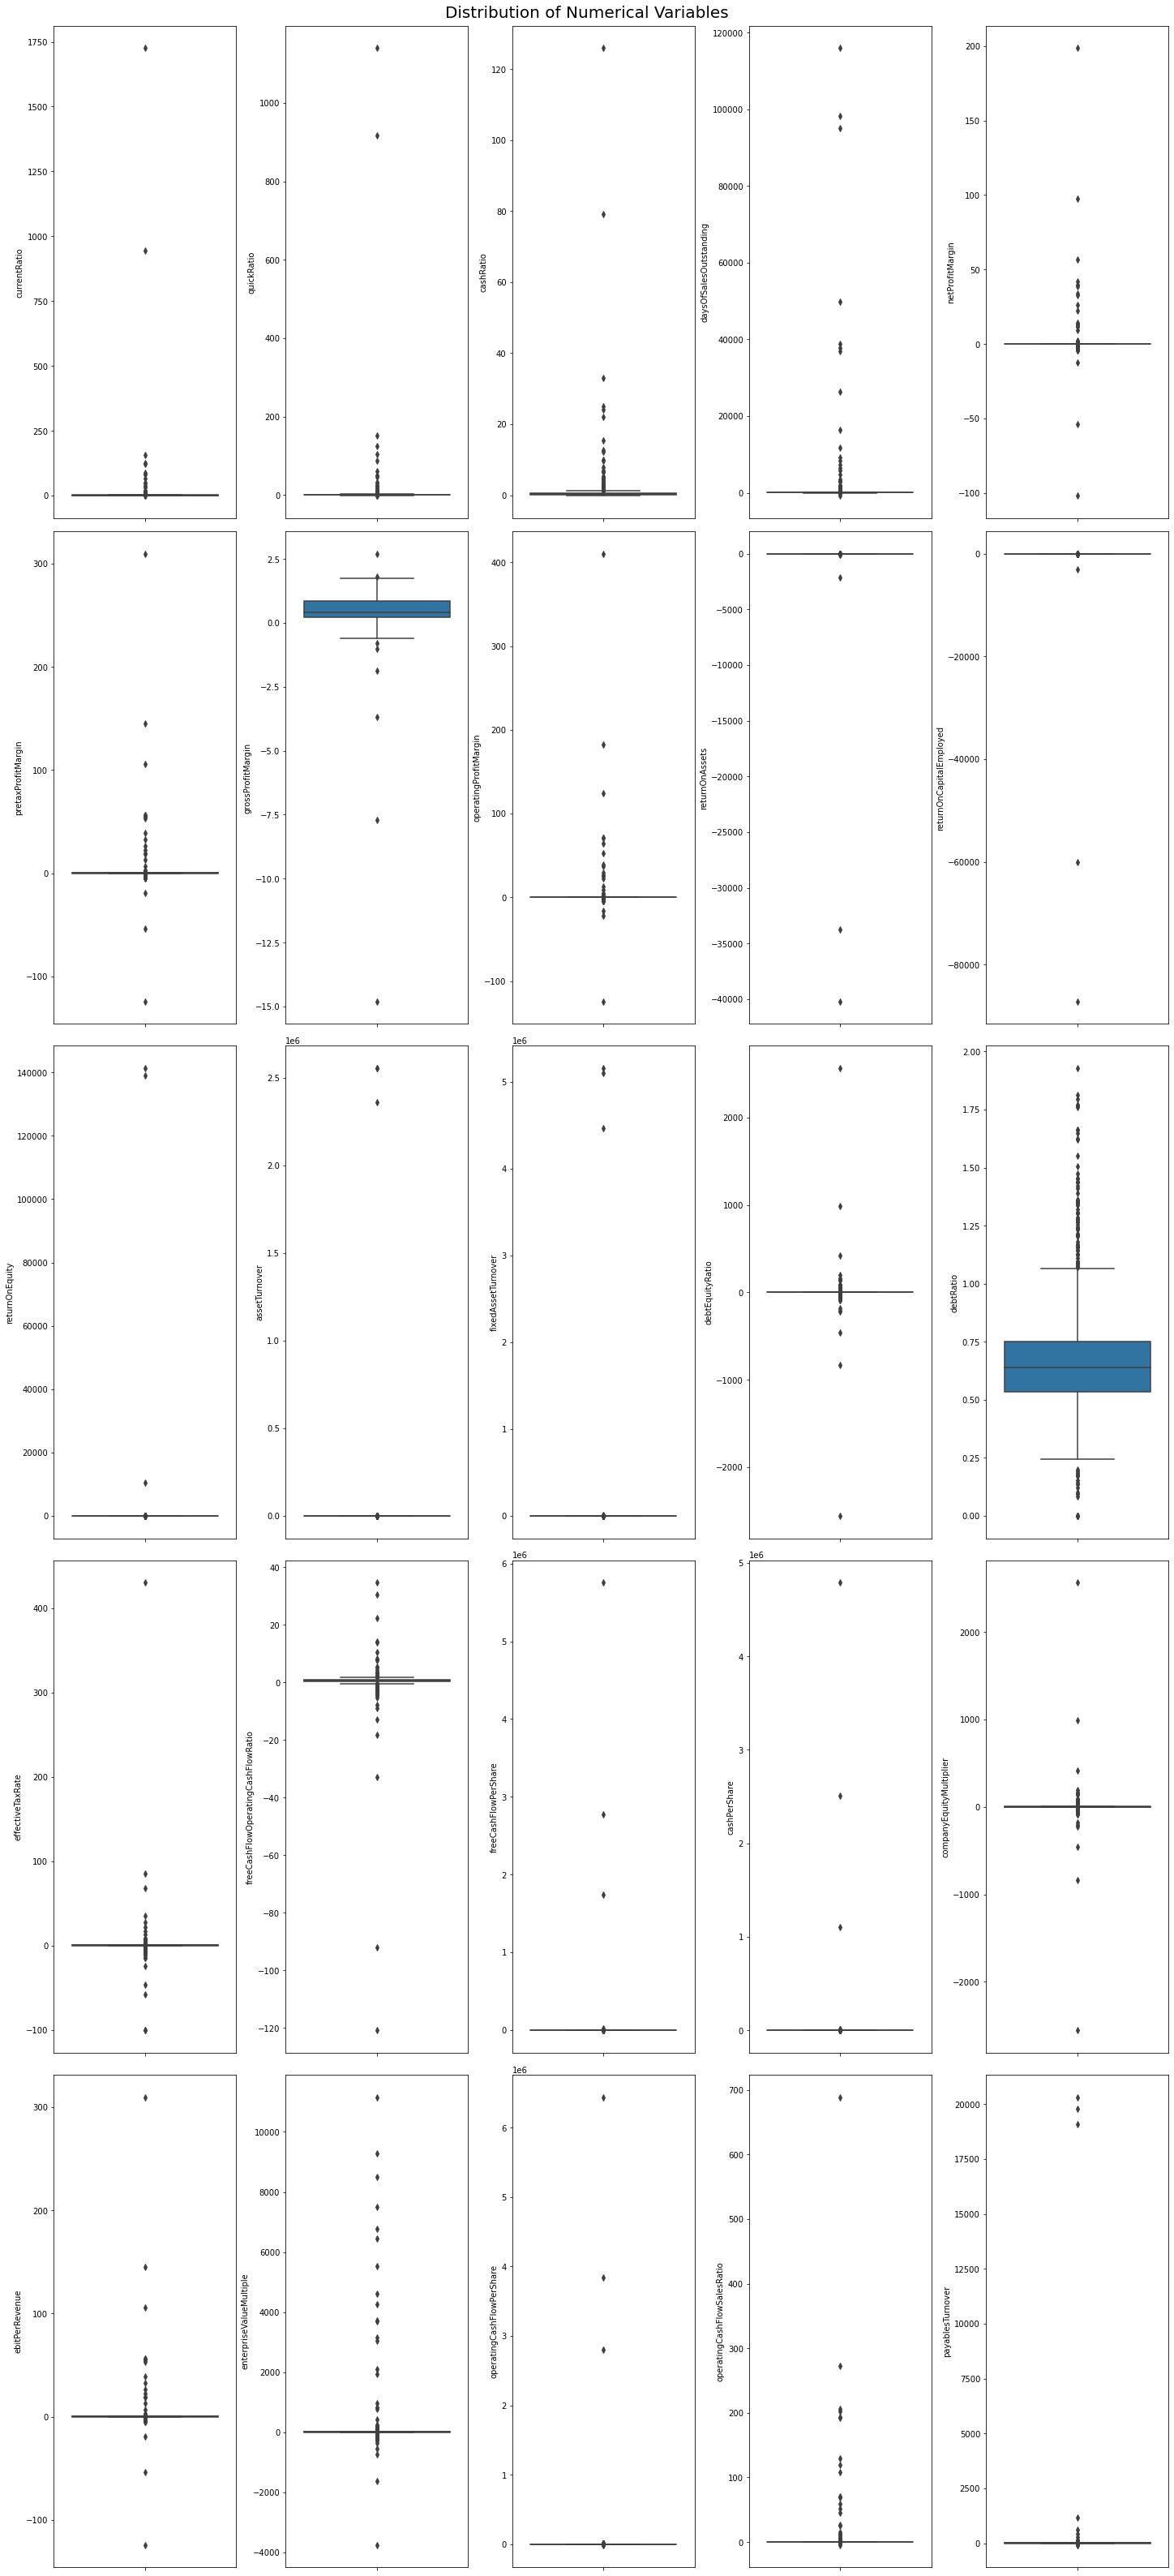

In [14]:
# Plot distributions of numerical variables

numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()

figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,44), constrained_layout = True)

figure.suptitle("Distribution of Numerical Variables", fontsize = 20)

i = 0 
j = 0

for c in numerical_cols:
    
    sns.boxplot(y = data[c], ax=axes[i, j])
    
    if j == 4:
        j=0
        i+=1
    else:
        j+=1   
        

It is clear that outliers are a generalized problem and almost all of the columns are skewed. However in a financial context, these may be legitimate as long as outliers are associated with the same company. The following cells check this.

In [15]:
# Ensure that high leverage ratio metrics are consistent
data.sort_values(by = 'quickRatio', ascending = False).head(5) 

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
1657,BB,AECOM,ACM,Standard & Poor's Ratings Services,2014-10-20,Consumer Services,1.398386,1139.541703,0.233812,115961.637400,0.027505,0.037669,0.048245,0.042227,0.037537,0.085829,0.105123,1.364734,29.636189,1.800517,0.642923,0.260569,0.825714,3.062689,1475.687450,2.800517,0.037669,7.874047,3.709142,0.043154,7.595444,2014,10,20
1659,BB,AECOM,ACM,Standard & Poor's Ratings Services,2016-10-20,Consumer Services,1.131206,916.656137,0.130476,94997.388120,0.005520,0.007211,0.036921,0.021569,0.007002,0.014908,0.028545,1.268387,26.993862,3.076943,0.754718,-0.301995,0.764927,4.023783,2139.774281,4.076943,0.007211,9.973156,5.260351,0.046761,8.774854,2016,10,20
1160,CCC,"Beazer Homes USA, Inc.",BZH,Standard & Poor's Ratings Services,2016-03-11,Capital Goods,1725.505005,152.133133,125.917417,121.876857,2.193554,0.140438,1.736794,0.328860,0.142117,0.009106,0.545814,0.064788,7.056500,2.840601,0.739624,-14.733046,1.196967,-3.511401,9.106088,3.840601,0.140438,25.723754,-2.933582,-0.516677,-1.017959,2016,3,11
33,A,Danaher Corporation,DHR,Moody's Investors Service,2012-06-15,Capital Goods,1.503431,125.950472,0.128715,69.184233,0.135003,0.152130,0.508166,0.162656,0.072531,0.094961,0.128500,0.537257,7.658551,0.771655,0.435556,0.209393,0.872644,3.389383,772.616019,1.771655,0.152130,9.730735,3.884039,0.163218,5.563600,2012,6,15
1832,BB,IHS Markit Ltd.,INFO,Moody's Investors Service,2016-06-28,Technology,0.989583,104.846875,0.304167,118.344710,0.136968,0.199838,1.000000,0.226603,0.027374,0.052353,0.069287,0.199856,3.545860,1.531122,0.604918,0.314607,0.965097,2.514965,549.522586,2.531122,0.216813,20.068637,2.605920,0.427160,0.000000,2016,6,28


In [16]:
# Ensure that high profitability measures are consistent
data.sort_values(by = 'netProfitMargin', ascending = False).head(5)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
370,BBB,EQT Corporation,EQT,Standard & Poor's Ratings Services,2011-04-11,Energy,1.386871,0.265423,0.000000,49868.164780,198.517873,309.694856,1.000000,410.182214,0.032077,0.054637,0.073960,0.000162,0.000194,1.305664,0.566285,0.358989,-0.578915,-3.164878,0.012073,2.305664,309.694856,7.572946,5.466918,688.526591,0.000000,2011,4,11
751,A,El Paso Electric Company,EE,Egan-Jones Ratings Company,2014-06-13,Public Utilities,1.300090,0.871082,0.186094,26240.649060,97.451045,145.476348,1.000000,182.216722,0.031792,0.049924,0.093855,0.000326,0.000488,1.952099,0.661258,0.330124,0.040667,0.250881,1.357187,2.952099,145.476348,8.035850,6.169201,272.249725,3.669682,2014,6,13
365,BBB,EQT Corporation,EQT,Egan-Jones Ratings Company,2015-03-09,Energy,2.284788,1.659927,1.292689,16302.498910,56.466511,105.604990,-14.800817,124.528674,0.032074,0.064436,0.084438,0.000568,0.000680,1.632640,0.620153,0.295825,0.876879,8.185638,7.109256,2.632640,105.604990,5.253758,9.334965,206.441267,0.243838,2015,3,9
366,BBB,EQT Corporation,EQT,Egan-Jones Ratings Company,2013-11-01,Energy,2.398550,2.312537,1.615638,9311.844298,42.260550,56.390175,1.000000,70.829258,0.039887,0.056228,0.096801,0.000944,0.001109,1.426906,0.587953,0.336148,-0.496900,-3.961361,6.472724,2.426906,56.390175,6.785360,7.972147,129.885090,0.000000,2013,11,1
750,A,El Paso Electric Company,EE,Egan-Jones Ratings Company,2015-11-30,Public Utilities,0.558228,0.356668,0.029412,11740.538310,39.727449,56.650339,1.000000,70.897672,0.025331,0.039507,0.080585,0.000638,0.000902,2.181241,0.685657,0.298725,-0.141026,-0.863737,0.806804,3.181241,56.650339,9.825208,6.124670,119.627061,3.141152,2015,11,30


In [17]:
data.sort_values(by = 'returnOnEquity', ascending = False).head(5)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
891,B,"YRC Worldwide, Inc.",YRCW,Egan-Jones Ratings Company,2014-12-19,Transportation,1.245439,1.063018,0.283582,0.000034,-0.013220,-0.016377,1.000000,0.008879,-33753.148610,-60057.887120,141350.211000,2.553149e+06,5.098592e+06,-4.187764,1.000000,0.000000,-1.464286,17498.932990,-0.072983,-4.187764,-0.016377,-0.000179,-11950.490820,0.005525,0.000000,2014,12,19
892,CC,"YRC Worldwide, Inc.",YRCW,Egan-Jones Ratings Company,2013-08-26,Transportation,1.364726,1.089041,0.301370,0.000034,-0.017061,-0.026516,1.000000,0.005755,-40213.178290,-87162.162160,139028.475700,2.357074e+06,4.467401e+06,-3.457286,1.000000,0.000000,-4.500000,6071.508882,-0.019789,-3.457286,-0.026516,-0.001024,-1349.224196,0.002467,0.000000,2013,8,26
893,B,"YRC Worldwide, Inc.",YRCW,Egan-Jones Ratings Company,2015-12-02,Transportation,1.280977,1.047120,0.301920,0.000032,-0.000828,-0.000828,1.000000,0.019247,-2111.932418,-3028.009084,10554.089710,2.551214e+06,5.156884e+06,-4.997361,1.000000,0.000000,0.228571,-0.253888,-0.000001,-4.997361,-0.000828,-5.090828,-1.110760,0.028974,0.000000,2015,12,2
75,BBB,Lockheed Martin Corporation,LMT,Moody's Investors Service,2012-12-14,Capital Goods,1.139860,0.156150,0.156150,0.000000,0.058179,0.086304,0.088932,0.093977,0.071009,0.153649,70.384615,1.220529e+00,1.009241e+01,990.205128,0.998991,0.325884,0.396541,1.912264,5.863454,991.205128,0.086304,6.079597,4.822366,0.033085,21.092247,2012,12,14
157,BBB,"L Brands, Inc.",LB,Egan-Jones Ratings Company,2015-12-10,Consumer Services,1.924955,1.170935,1.001191,8.030382,0.090973,0.142832,0.419766,0.170508,0.138123,0.278943,57.888889,1.518293e+00,5.030303e+00,418.111111,0.997614,0.363081,0.599664,3.669357,5.872342,419.111111,0.142832,12.788212,6.119021,0.155928,10.841762,2015,12,10


In [18]:
# Ensure that liquidity ratios are consistent
data.sort_values(by = 'payablesTurnover', ascending = False).head(5)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
1412,AA,"J.B. Hunt Transport Services, Inc.",JBHT,Egan-Jones Ratings Company,2015-04-16,Transportation,1.448922,1.246107,0.009813,38.705289,0.060789,0.098063,1.000000,0.102433,0.110326,0.216728,0.311154,1.814904,2.483529,1.820301,0.645428,0.380100,-0.250147,-1382.820513,881.521367,2.820301,0.098063,1.011721,5528.025641,0.104904,20314.880400,2015,4,16
1411,AA,"J.B. Hunt Transport Services, Inc.",JBHT,Egan-Jones Ratings Company,2014-04-17,Transportation,0.954944,0.896453,0.008186,37.157632,0.061309,0.099125,1.000000,0.103268,0.121438,0.262715,0.338171,1.980763,2.643954,1.784729,0.640899,0.381500,0.140889,688.979898,596.182173,2.784729,0.099125,0.857083,4890.216179,0.102846,19774.759790,2014,4,17
1413,AA,"J.B. Hunt Transport Services, Inc.",JBHT,Egan-Jones Ratings Company,2015-10-16,Transportation,1.614086,1.400714,0.010454,38.610455,0.069046,0.111545,1.000000,0.115665,0.117483,0.222348,0.328553,1.701507,2.290593,1.796602,0.642423,0.381001,0.169684,1281.032530,788.592374,2.796602,0.111545,1.097188,7549.538802,0.141137,19100.995500,2015,10,16
520,BB,MSCI Inc,MSCI,Moody's Investors Service,2012-06-15,Miscellaneous,1.497207,1.266035,0.556997,73.153059,0.192525,0.292375,0.692381,0.357402,0.056080,0.099770,0.132871,0.291284,23.946549,1.369328,0.577939,0.341513,0.909368,1.920906,3.253071,2.369328,0.292375,11.499094,2.112354,0.283034,1159.610879,2012,6,15
1996,CCC,Entercom Communications Corp.,ETM,Moody's Investors Service,2012-06-15,Consumer Services,2.592713,2.320689,0.115453,65.854630,0.179005,0.136040,0.311729,0.207649,0.074525,0.058640,0.272792,0.416327,6.554330,2.660426,0.726808,-0.315830,0.933213,0.002195,0.000105,3.660426,0.136040,3044.164783,0.002352,0.223462,614.032634,2012,6,15


Outliers will be retained for the purpose of model training. However the presence of a small number of outliers greatly reduces the ability to visualise the overall distribution of the variables. To address this outliers are dropped for the purpose of EDA. The following code achieves this; outliers are defined as 1.5 * IQR. 

In [19]:
# Drop outliers for purpose of EDA using Tukey Rule

def tukey_rule(dataframe, column_name_list):
    
    '''
    Detects outliers using the Tukey rule and removes entire row from dataframe
    
    Inputs: 
    dataframe - dataframe
    column_name_list - list of columns to be assessed for outliers
    
    Outputs:
    data_winz - dataframe with outlier rows removed
    perc_outliers - percentage of each feature classified as an outlier
    '''
    
    data_winz = dataframe.copy()
    perc_outliers = []
    
    for col in column_name_list:

        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)

        IQR = Q3-Q1

        max_value = Q3 + 1.5 * IQR
        min_value = Q1 - 1.5 * IQR
        
        # Calculate percentage of each column that is outwith max and min Tukey values
        perc_outliers.append(100 * len(dataframe[(dataframe[col] > max_value) | (dataframe[col] < min_value)][col])/len(dataframe[col]))
        
        # Winzorize columns based on using Tukey fences to remove outliers
        data_winz[col] = data_winz[col].clip(min_value, max_value)
    
    return data_winz, perc_outliers


In [20]:
# Create winzerized dataset and find percentage outliers for each variable
data_winz, perc_outliers = tukey_rule(data, numerical_cols)

In [21]:
# Create outlier comparison table
outlier_comparison = pd.DataFrame()
outlier_comparison['col'] = numerical_cols
outlier_comparison['mean_outliers'] = data[numerical_cols].mean().values
outlier_comparison['mean_data_winz'] = data_winz[numerical_cols].mean().values

outlier_comparison['perc_outliers'] = perc_outliers
outlier_comparison.sort_values('perc_outliers', ascending = False) # no impact on mean values by winzorzing data

,col,mean_outliers,mean_data_winz,perc_outliers
10,returnOnEquity,143.494296,0.125372,15.524889
13,debtEquityRatio,2.328306,1.958219,13.947758
19,companyEquityMultiplier,3.323579,2.962596,13.652045
15,effectiveTaxRate,0.397572,0.259872,12.025628
5,pretaxProfitMargin,0.431483,0.089040,11.631345
4,netProfitMargin,0.278447,0.069567,11.434204
20,ebitPerRevenue,0.437454,0.092958,11.089207
21,enterpriseValueMultiple,48.287985,9.866521,11.039921
18,cashPerShare,4227.548561,5.674842,10.103499
17,freeCashFlowPerShare,5094.718642,2.538900,9.955643


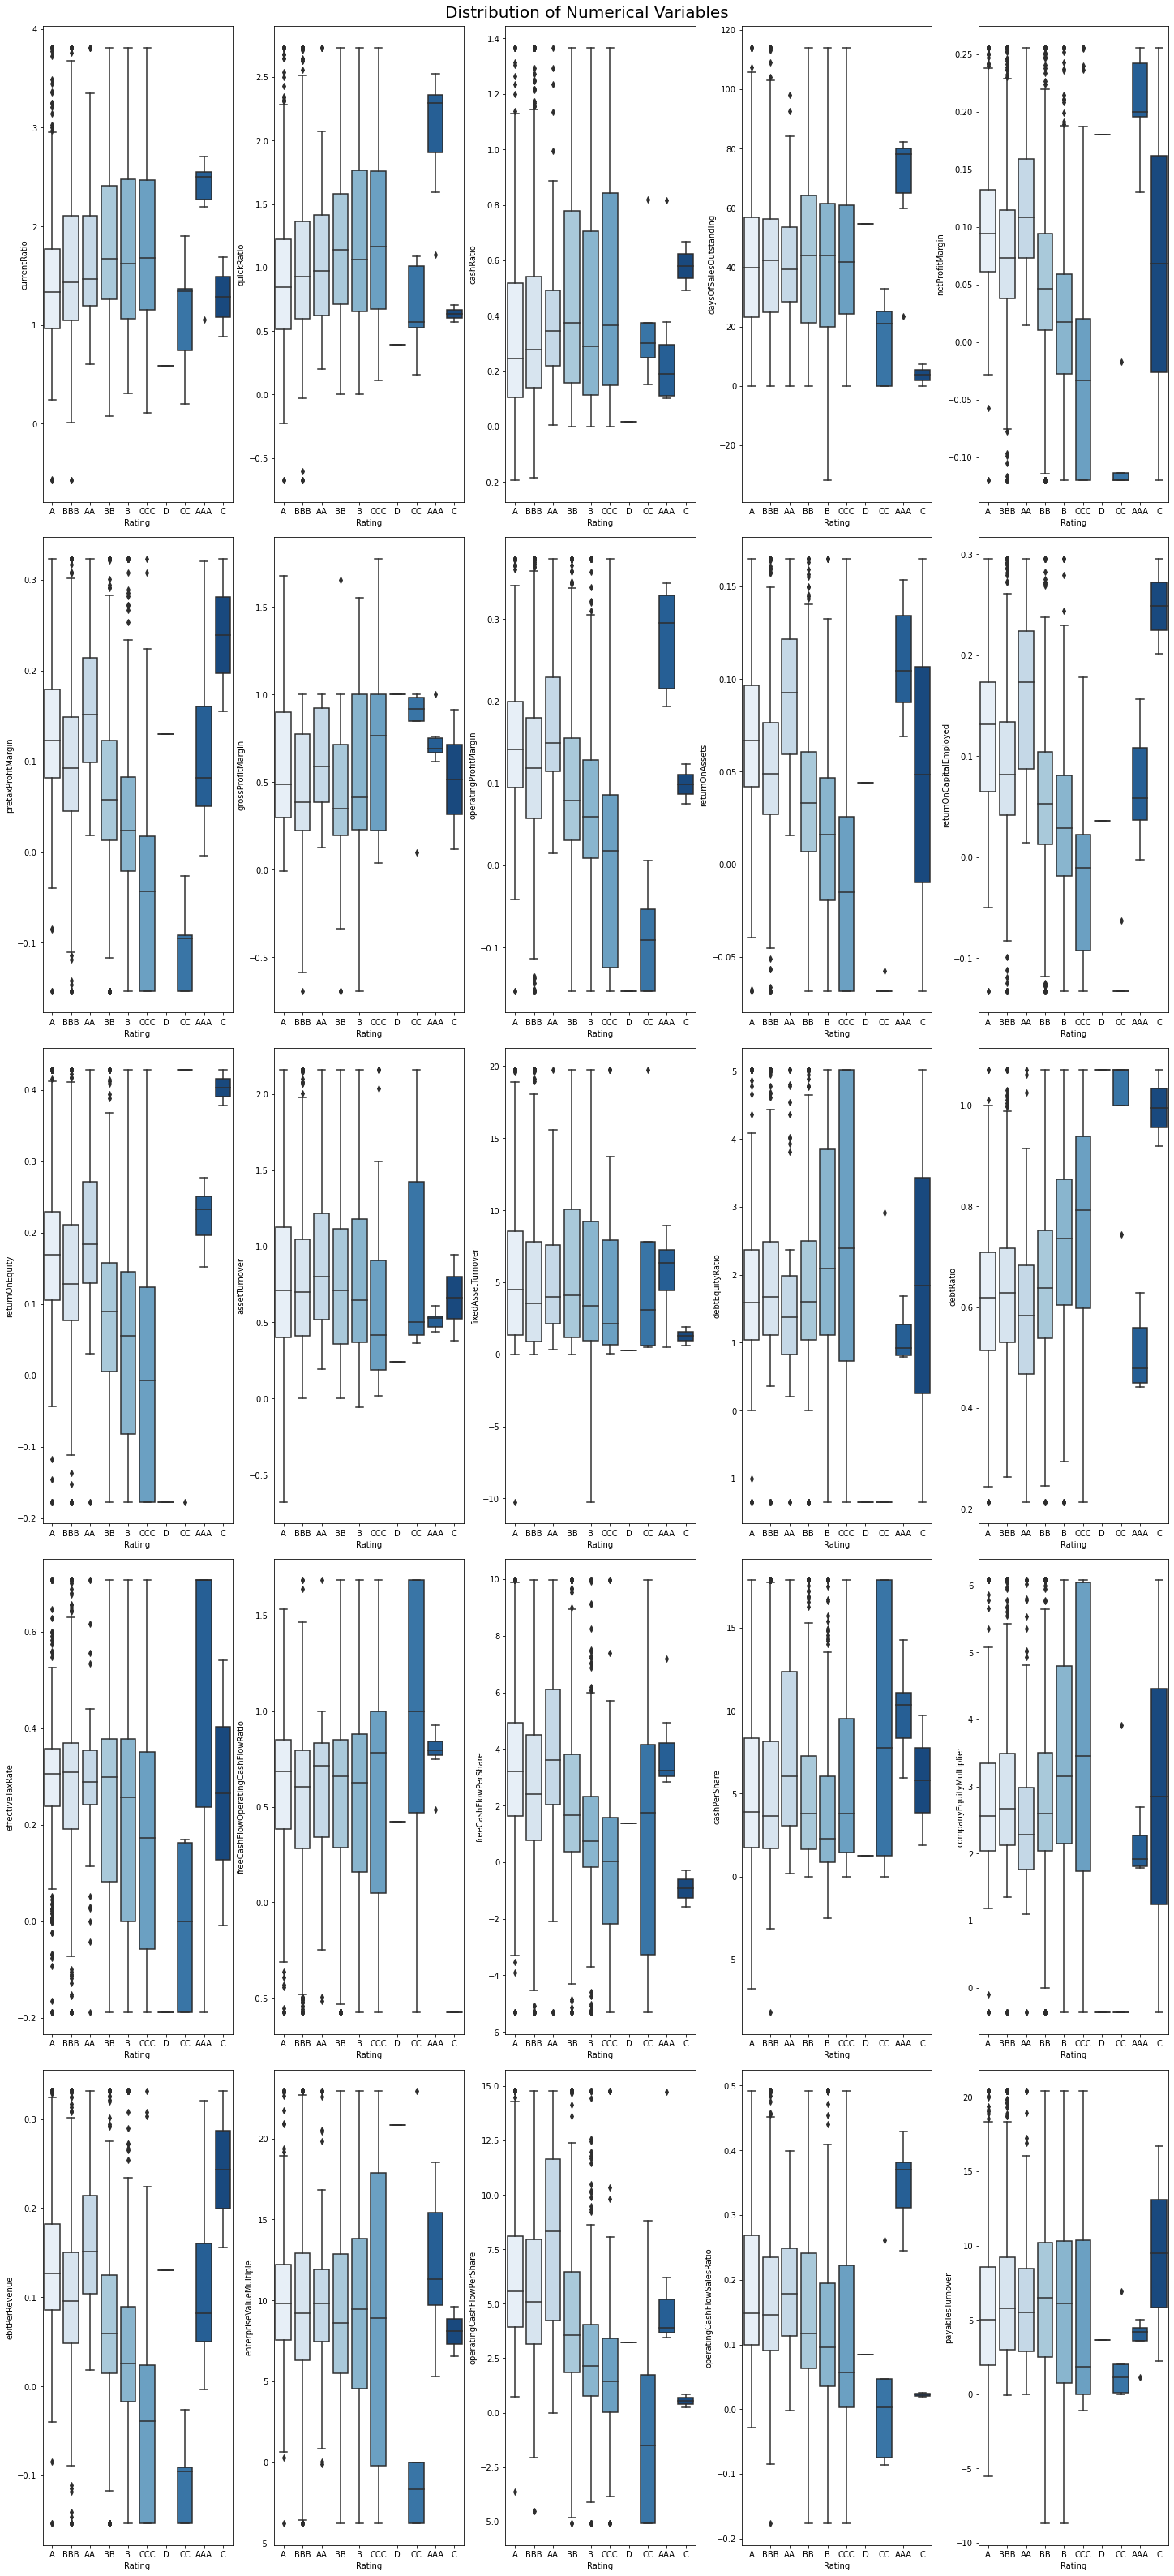

In [22]:
# Plot distributions of numerical variables again, by Rating, using outlier-trimmed data. 

figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,44), constrained_layout = True)

figure.suptitle("Distribution of Numerical Variables", fontsize = 20)


i = 0 
j = 0
for c in numerical_cols:
    
    sns.boxplot(x=data_winz.Rating, y=data_winz[c], ax=axes[i, j], palette = 'Blues')
    
    if j == 4:
        j=0
        i+=1
    else:
        j+=1   
        


The plots above show a difference in medians according to the rating (i.e. solvency risk of the company). This indicates that these numerical variables may hold predictive power in a classification model.

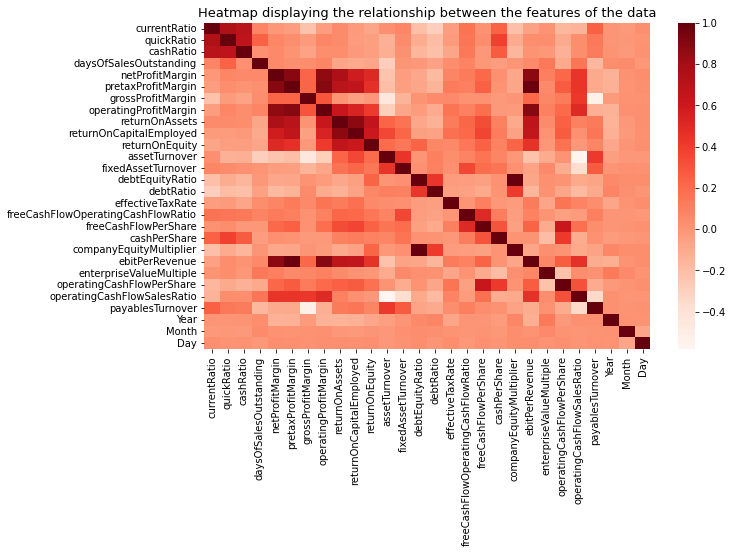

In [23]:
# Plot correlation between the variables
corr_matrix = data_winz.corr().abs()
plt.figure(figsize=(10,6))
sns.heatmap(data_winz.corr(),cmap=plt.cm.Reds,annot=False)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [24]:
# View features with highest correlations
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)[25:55]
so

Month                    Month                      1.000000
cashRatio                cashRatio                  1.000000
Day                      Day                        1.000000
debtEquityRatio          companyEquityMultiplier    0.994146
companyEquityMultiplier  debtEquityRatio            0.994146
ebitPerRevenue           pretaxProfitMargin         0.984156
pretaxProfitMargin       ebitPerRevenue             0.984156
operatingProfitMargin    ebitPerRevenue             0.899682
ebitPerRevenue           operatingProfitMargin      0.899682
operatingProfitMargin    pretaxProfitMargin         0.896706
pretaxProfitMargin       operatingProfitMargin      0.896706
netProfitMargin          pretaxProfitMargin         0.893918
pretaxProfitMargin       netProfitMargin            0.893918
returnOnAssets           returnOnCapitalEmployed    0.881479
returnOnCapitalEmployed  returnOnAssets             0.881479
ebitPerRevenue           netProfitMargin            0.880681
netProfitMargin         

Several variables display an almost perfect correlation. Models such as multinomial linear regression and Naïve Bayes rely on the assumption of no muticollinearity. As such, in order to fit these models, a number of variables will be removed such that no pairwise correlation exists in the dataset above 0.8. 

In [25]:
# Remove companyEquityMultiplier, pretaxProfitMargin, ebitPerRevenue, returnOnCapitalEmployed, quickRatio
data_winz_trim = data_winz.drop(columns = ['companyEquityMultiplier', 'pretaxProfitMargin', 'returnOnCapitalEmployed',
                                     'ebitPerRevenue', 'quickRatio'])

# Recheck correlation
corr_matrix_trim = data_winz_trim.corr().abs()
s = corr_matrix_trim.unstack()
so = s.sort_values(kind="quicksort", ascending = False)[25:55]
so

returnOnAssets                      netProfitMargin                       0.755604
netProfitMargin                     returnOnAssets                        0.755604
currentRatio                        cashRatio                             0.699601
cashRatio                           currentRatio                          0.699601
returnOnAssets                      returnOnEquity                        0.664915
returnOnEquity                      returnOnAssets                        0.664915
operatingCashFlowPerShare           freeCashFlowPerShare                  0.620408
freeCashFlowPerShare                operatingCashFlowPerShare             0.620408
operatingProfitMargin               returnOnAssets                        0.617885
returnOnAssets                      operatingProfitMargin                 0.617885
operatingCashFlowSalesRatio         assetTurnover                         0.581113
assetTurnover                       operatingCashFlowSalesRatio           0.581113
paya

#### Perform pre-processing steps identified in EDA

### Data pre-processing

We will now perform the preprocessing steps identified in the previous section

1. Split 'Date' into 'Year', 'Month' and 'Day' and remove 'Year' 
2. Apply a cyclical transformation to 'Month' and 'Day'
3. Remove irrelevant columns 'Date', 'Symbol', and 'Name'
4. Drop highly correlated columns
5. Reclassify 'Rating' to partially rebalance
6. Apply label encoding to target variable
7. One-hot encode 'Rating Agency Name' and 'Sector'

In [26]:
# Change date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month and year from date
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Convert Year, Month and Day into cyclical variables
cyclical = CyclicalFeatures(variables=['Month', 'Day'], drop_original=True)
data = cyclical.fit_transform(data)

# Remove 'Date', 'Symbol' and 'Name' columns
data.drop(columns = ['Date', 'Symbol', 'Name'], inplace = True)

In [27]:
# Remove highly correlated columns
data= data.drop(columns = ['companyEquityMultiplier', 'pretaxProfitMargin', 'returnOnCapitalEmployed',
                                     'ebitPerRevenue', 'quickRatio'])

In [28]:
# Reclassify 'Rating' column due to few data points for some categories - target variable will still need to be rebalanced
data['Rating'] = data['Rating'].replace({'AA':'AAA/AA', 'AAA':'AAA/AA', 'CCC': 'CCC and below', 'CC': 'CCC and below', 'C':'CCC and below', 'D':'CCC and below'})
data.Rating.value_counts()

BBB              671
BB               490
A                398
B                302
AAA/AA            96
CCC and below     72
Name: Rating, dtype: int64

In [29]:
# Apply label encoding to target variable
le = preprocessing.LabelEncoder()
le.fit(data.Rating.unique())
data.Rating = le.transform(data.Rating) # encode rating

In [30]:
# Define target and response variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

Class=0, n=398 (19.616%)
Class=4, n=671 (33.070%)
Class=1, n=96 (4.731%)
Class=3, n=490 (24.150%)
Class=2, n=302 (14.884%)
Class=5, n=72 (3.549%)


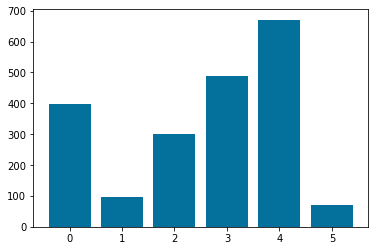

In [31]:
# Summarize distribution to demonstrate imbalance
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# Plot the distribution
plt.bar(counter.keys(), counter.values(), color = 'xkcd:ocean blue')
plt.show()

There is a high imbalance in the data. Resampling techniques will be investigated in model training.

In [32]:
# Define numerical and categorical columns
numerical_ix = data.iloc[:, 3:23].columns.tolist()
categorical_ix = ['Rating Agency Name', 'Sector']

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown = 'ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_ix]).toarray())
X_encoded.columns = encoder.get_feature_names_out(categorical_ix)
X = X.join(X_encoded)
X.drop(columns = categorical_ix, axis = 1, inplace = True)

In [33]:
# Save features and target
X.to_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/features_preproc.csv')
y.to_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/target_preproc.csv')